In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
from pathlib import Path

In [5]:
#create a reference to the file
database_path = Path("Resources/hawaii.sqlite")

In [6]:
# create engine to hawaii.sqlite
engine = create_engine(f"sqlite:///{database_path}")

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with = engine)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
sessions = Session(bind=engine)
sessions

# Exploratory Precipitation Analysis

In [11]:
measure = engine.execute('SELECT * FROM Measurement')

In [12]:
print(measure.keys())

RMKeyView(['id', 'station', 'date', 'prcp', 'tobs'])


In [13]:
# Find the most recent date in the data set.
most_recentDate = (sessions.query(Measurement.date).order_by(Measurement.date.desc()).first())
most_recentDate

('2017-08-23',)

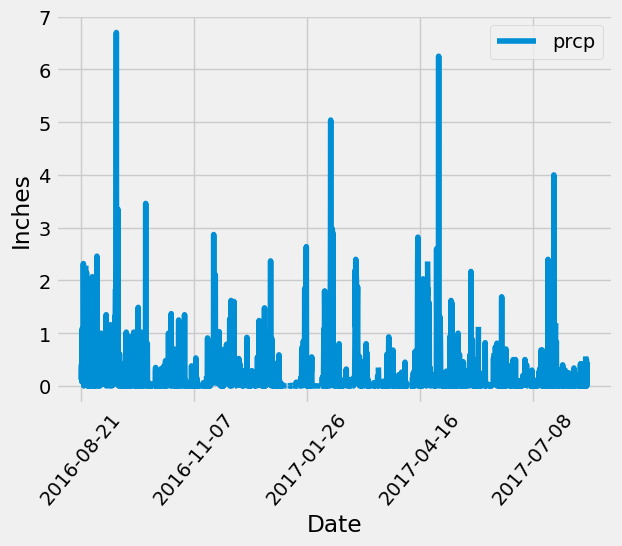

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
date_oneYear = dt.date(2017,8,23)-dt.timedelta(days = 366)
date_oneYear
# Perform a query to retrieve the data and precipitation scores

measurementData = sessions.query(Measurement.date,Measurement.prcp).filter(Measurement.date > '2016-08-2016').\
                  order_by(Measurement.date).all()
                   
#measurementData
# Save the query results as a Pandas DataFrame and set the index to the date column

measureDF = pd.DataFrame(measurementData)
measureDataDF = measureDF.set_index("date")
measureDataDF
# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data

measureDataDF.plot()
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation = 50)

plt.show()


In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measureDataDF.describe()

,prcp
count,2031.000000
mean,0.179985
std,0.463894
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
totStation = sessions.query(Station.station).count()
totStation

9

In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_Stations = sessions.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station)\
                  .order_by(func.count(Measurement.station).desc()).all()
active_Stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperatures
sessions.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                                filter(Measurement.station=='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

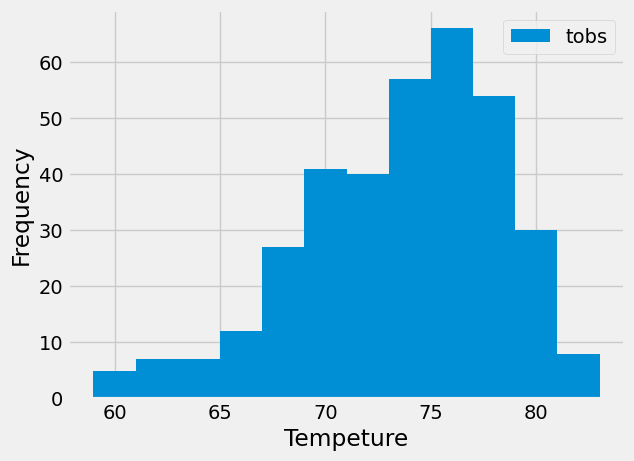

In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_obv = sessions.query(Measurement.date,Measurement.tobs).\
            filter(Measurement.date >'2016-08-2016').\
            filter(Measurement.station=='USC00519281').all()


year_obvDF=pd.DataFrame(year_obv)
year_StationDF = year_obvDF.set_index('date')
year_StationDF


year_StationDF.plot.hist(bins = 12)

plt.xlabel('Tempeture')
plt.ylabel('Frequency')
plt.show()


# Close session

In [20]:
# Close Session
sessions.close()